<center>
    <h1>💸 Free Lunch Theorem 💸</h1>
    <h3>Algorithmic Analysis of Polish Bookmaker Welcome Offers</h3>
</center>

---

As of **December 8, 2025**, the Polish betting landscape consists of **17 legal operators**, all vying for liquidity in a highly regulated environment. This project focuses exclusively on the welcome promotions available on this specific date, dissecting the terms and conditions of each offer to determine their true financial viability. The primary objective is to cut through the marketing noise and calculate the actual profitability of these bonuses, identifying which operators offer genuine value and which are simply setting a trap.

In [1]:
# Imports
import random
import numpy as np
import engine
import offers
import odds
import pandas as pd

%load_ext autoreload
%autoreload 2

# Settings
pd.options.display.float_format = '{:.2f}'.format

## Turnover-Based Promotions (Deposit Bonuses)

Turnover-based promotions (Deposit Bonuses) are the most common form of welcome offers in the Polish betting market. While specific terms vary by operator, the core mechanism remains consistent: a player makes a deposit and receives a corresponding bonus (usually a percentage of the deposit), often accompanied by an additional Freebet.

From a mathematical perspective, this format offers the *owest ruin risk. Unlike promotions that force high-stakes play, turnover requirements allow for diversification. By spreading the volume across many small, fixed bets (e.g., 10 PLN, as used in this simulation), variance is minimized. This strategy significantly increases the probability of realizing the theoretical Expected Value (EV) by reducing the impact of short-term volatility.

---

### <span style="color: #1E90FF;">Admiralbet</span>: Offer Analysis

<span style="color: #1E90FF;">Admiralbet</span> serves as a prime example of this promotional strategy. Their welcome package is structured into three progressive stages, incentivizing the first three deposits with a mix of bonus funds and Freebets.

The simulation is governed by the specific terms and conditions of the promotion outlined below:

1.  **Stage 1:** A **200 PLN** bonus (100% match) combined with a **25 PLN Freebet**. The required turnover is set at <span style="color: #1E90FF;">600 PLN</span>.
2.  **Stage 2:** A significantly larger **600 PLN** bonus (requiring a 1200 PLN deposit) accompanied by a **75 PLN Freebet**. This stage demands a turnover of <span style="color: #1E90FF;">1800 PLN</span>.
3.  **Stage 3:** A **400 PLN** bonus (requiring a 1600 PLN deposit) with no accompanying Freebet. The turnover requirement here is <span style="color: #1E90FF;">1600 PLN</span>.

Across all three stages, the wagering constraints remain consistent to ensure validity: every coupon must be an **accumulator (AKO)** consisting of at least **3 legs**, with total minimum odds of **2.50**.

In [2]:
admiral_overround = engine.overround_calculator(odds.admiral_odds)
data_stage_1 = engine.monte_carlo(offers.Admiralbet["Offer_1"], admiral_overround)
data_stage_2 = engine.monte_carlo(offers.Admiralbet["Offer_2"], admiral_overround)
data_stage_3 = engine.monte_carlo(offers.Admiralbet["Offer_3"], admiral_overround)

data_values = [
    [offers.Admiralbet["Offer_1"]["deposit"], offers.Admiralbet["Offer_1"]["bonus"], offers.Admiralbet["Offer_1"]["free_bet"]["value"], (admiral_overround-1)*100, np.mean(data_stage_1), np.std(data_stage_1), engine.chance_of_profit(data_stage_1)],
    [offers.Admiralbet["Offer_2"]["deposit"], offers.Admiralbet["Offer_2"]["bonus"], offers.Admiralbet["Offer_2"]["free_bet"]["value"], (admiral_overround-1)*100, np.mean(data_stage_2), np.std(data_stage_2), engine.chance_of_profit(data_stage_2)],
    [offers.Admiralbet["Offer_3"]["deposit"], offers.Admiralbet["Offer_3"]["bonus"], offers.Admiralbet["Offer_3"]["free_bet"], (admiral_overround-1)*100, np.mean(data_stage_3), np.std(data_stage_3), engine.chance_of_profit(data_stage_3)]
]
columns = ["Deposit", "Bonus","Free bet","Overround","EV (PLN)", "Std Dev", "Chance for profit"]
index_names = ["Admiralbet Stage 1", "Admiralbet Stage 2", "Admiralbet Stage 3"]
df = pd.DataFrame(data=data_values, index=index_names, columns=columns)
df

,Deposit,Bonus,Free bet,Overround,EV (PLN),Std Dev,Chance for profit
Admiralbet Stage 1,200,200,25.00,5.08,70.15,86.49,77.40
Admiralbet Stage 2,1200,600,75.00,5.08,210.27,163.71,90.49
Admiralbet Stage 3,1600,400,NaN,5.08,13.51,137.72,53.62


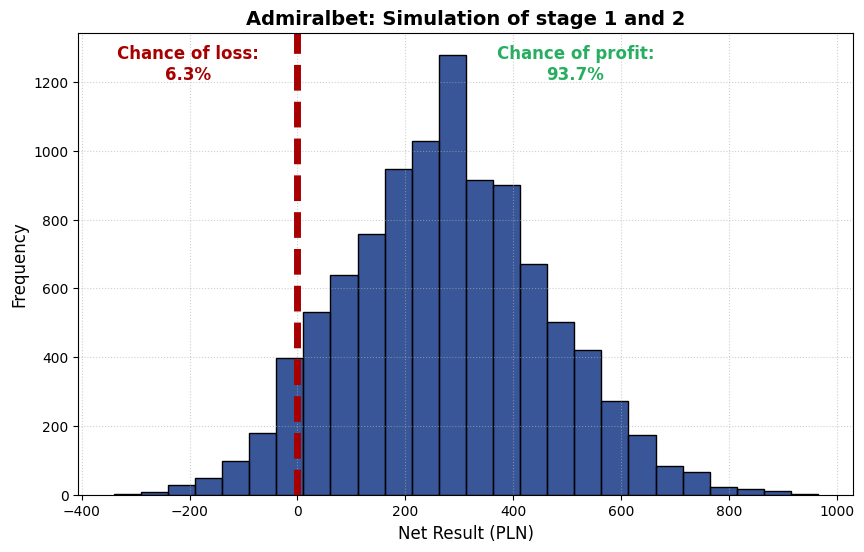

In [12]:
# Simulating stage 1 and stage 2 of the offer
results = []
tries = 10000
offer1 = offers.Admiralbet["Offer_1"]
offer2 = offers.Admiralbet["Offer_2"]
while tries > 0:
    tries -= 1
    offer_1_outcome = engine.many_bets(offer1["min_odds"]+0.15, 10, admiral_overround, offer1["legs"], offer1["tax"], offer1["bonus"] + offer1["deposit"], offer1["turnover"], offer1["free_bet"])
    offer_2_outcome = engine.many_bets(offer2["min_odds"]+0.15, 10, admiral_overround, offer2["legs"], offer2["tax"], offer2["bonus"] + offer2["deposit"], offer2["turnover"], offer2["free_bet"])
    results.append(offer_1_outcome+offer_2_outcome)
results = np.array(results) - offers.Admiralbet["Offer_1"]["deposit"]- offers.Admiralbet["Offer_2"]["deposit"]

engine.visualize_results(results, title="Admiralbet: Simulation of stage 1 and 2")

The algorithmic analysis reveals a stark contrast between the initial and final stages of the promotion.

* **Stages 1 & 2 (Highly Recommended):** These stages demonstrate exceptional mathematical robustness. They remain profitable even under a stress test where the bookmaker's margin is doubled compared to the observed sample (~5.08%).
* **Stage 3 (High Risk):** This stage sits on the razor's edge of profitability. Even with a competitive margin (~5%), the probability of profit hovers near **50%**, effectively rendering it a coin flip. Any slight increase in the margin above the sample parameters turns this stage into a negative EV proposition.

**Projected Performance:**
New customers participating in the offer can expect a **Net Profit (EV) of approximately <span style="color: #1E90FF;">270 PLN</span>**. However, it is crucial to note the **Standard Deviation is ~<span style="color: #1E90FF;">190 PLN</span>**. This indicates that despite the diversification strategy, the variance remains high.

### <span style="color: #009933;">Betfan</span>: Even better ROI

<span style="color: #009933;">Betfan</span> offers a streamlined "3x100%" welcome package. While technically divided into three transactions, effectively it represents a single massive opportunity with identical execution rules.

By maximizing this offer, a player commits a total **Deposit of 600 PLN** to unlock a total **Bonus of 600 PLN** plus an additional **25 PLN Freebet**.

The simulation analyzes this as a cumulative operation with the following aggregate parameters:

* **Total Deposit:** 600 PLN
* **Total Bonus Value:** 625 PLN (600 PLN Cash + 25 PLN Freebet)
* **Total Required Turnover:** <span style="color: #009933;">1200 PLN</span>

The wagering constraints are uniform across the entire volume: every coupon must be an **accumulator (AKO)** consisting of at least **2 legs**, with total minimum odds of **3.00**.

In [6]:
betfan_overround = engine.overround_calculator(odds.betfan_odds)
data = engine.monte_carlo(offers.Betfan, betfan_overround)

data_values = [
    [offers.Betfan["deposit"], offers.Betfan["bonus"], offers.Betfan["free_bet"]["value"], (betfan_overround-1)*100, np.mean(data), np.std(data), engine.chance_of_profit(data)],
]
columns = ["Deposit", "Bonus","Free bet","Overround","EV (PLN)", "Std Dev", "Chance for profit"]
index_names = ["Betfan"]
df = pd.DataFrame(data=data_values, index=index_names, columns=columns)
df

,Deposit,Bonus,Free bet,Overround,EV (PLN),Std Dev,Chance for profit
Betfan,600,600,25,8.81,304.68,137.19,99.03


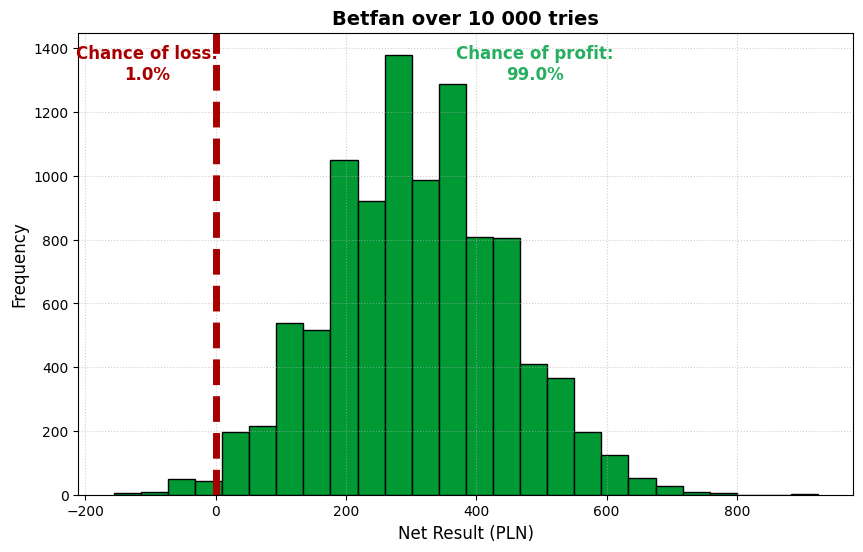

In [11]:
engine.visualize_results(data, "Betfan over 10 000 tries", color = "#009933")

The simulation results for <span style="color: #009933;">Betfan</span> are nothing short of impressive.

* **Exceptional ROI:** Generating an **Expected Value (EV) of ~300 PLN** from a total deposit of only **600 PLN** yields a theoretical return on investment of **50%**. This ratio makes it one of the most lucrative offers currently available on the Polish market.
* **The Margin Paradox:** Interestingly, analysis of the raw odds data reveals that <span style="color: #009933;">Betfan</span> operates with an average **overround (margin) nearly twice as high** as <span style="color: #1E90FF;">Admiralbet</span>.
* **Terms over Odds:** Despite the "expensive" odds, the promotion remains highly profitable due to the lenient wagering requirements (only **1x turnover** of the bonus funds). This proves that favorable bonus terms can mathematically outweigh a higher house edge.

### <span style="color: #003D99;">Etoto</span>: The Tax-Free <span style="color: #009933;">Betfan</span>

<span style="color: #003D99;">Etoto</span> disrupts the standard Polish betting model with a singular, powerful advantage: **0% Tax**. By removing the standard 12% turnover tax on the promotional play, EV increases greatly.

The offer structure is a classic deposit match with highly favorable constraints:

1.  **The Package:** A **700 PLN** bonus (100% match) triggered by a 700 PLN deposit, supplemented by a **77 PLN Freebet**.
2.  **Volume:** The total turnover required is set at <span style="color: #003D99;">2100 PLN</span> (3x Bonus).

Unlike competitors demanding high-risk odds (2.50+), Etoto requires an **accumulator (AKO) with 3 legs**, but with a remarkably low total minimum odds of just **2.00**.

In [37]:
etoto_overround = engine.overround_calculator(odds.etoto_odds)
data = engine.monte_carlo(offers.Etoto, etoto_overround)

data_values = [
    [offers.Etoto["deposit"], offers.Etoto["bonus"], offers.Etoto["free_bet"]["value"], (etoto_overround-1)*100, np.mean(data), np.std(data), engine.chance_of_profit(data)],
]
columns = ["Deposit", "Bonus","Free bet","Overround","EV (PLN)", "Std Dev", "Chance for profit"]
index_names = ["Etoto"]
df = pd.DataFrame(data=data_values, index=index_names, columns=columns)
df

,Deposit,Bonus,Free bet,Overround,EV (PLN),Std Dev,Chance for profit
Etoto,700,700,77,6.76,378.66,174.47,98.63


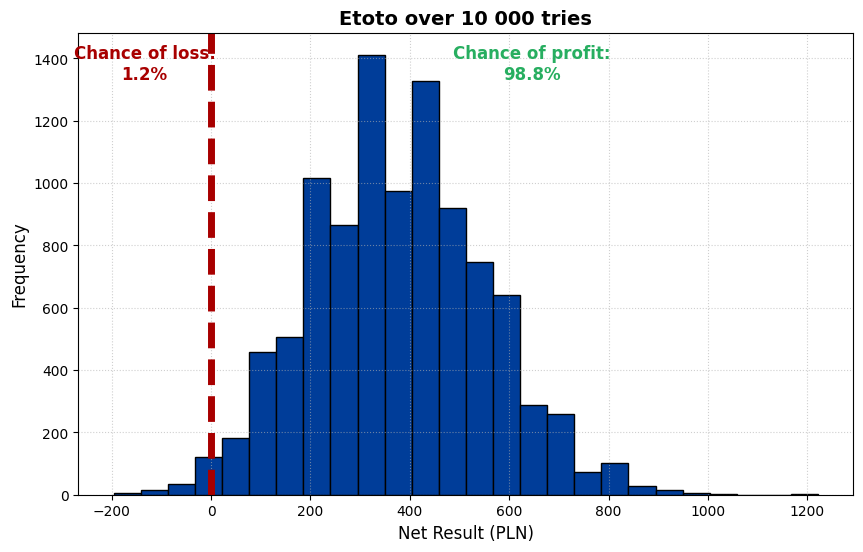

In [31]:
engine.visualize_results(data, "Etoto over 10 000 tries", color = "#003D99")

The **0% tax** on Etoto's bonus play is its biggest advantage, making this offer unique in the Polish market. Because the standard 12% tax is removed, the player's statistical edge is much higher. Even with a moderate bookmaker margin, our simulations confirm high profitability, showing an Expected Value (EV) of about **~370 PLN**.